# Logistic regression with stochastic gradient descent

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Generate some data


Synthetic data. `y` is generated by flipping a fair coin. `X` is generated from a mixture of Gaussians with fixed cluster centers.


In [2]:
np.random.seed(42)

In [3]:
def generate_data(n=100):
    # y generated using fair coin flip
    y = (np.random.rand(n) > 0.5).astype(np.int8)
    
    # x location is cluster center + gaussian noise
    centers = np.array([[1, 5], [5, 1]])
    X = centers[y] + np.random.randn(n,2) * 0.8
    
    return X, y

In [4]:
X, y = generate_data()

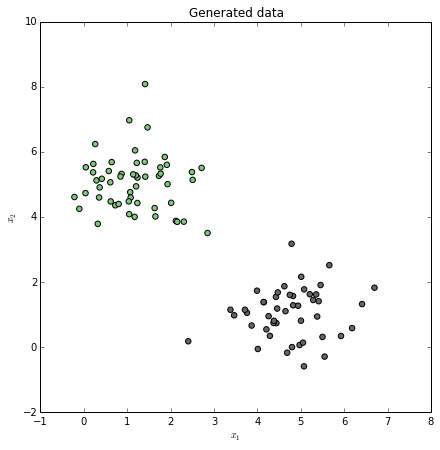

In [5]:
figure(figsize=(7,7))
scatter(X[:,0], X[:,1], c=y, cmap=cm.Accent, s=30)
title('Generated data')
xlabel('$x_1$')
ylabel('$x_2$')

## 2. Define the model, loss, and gradient

The model is a sigmoid of a linear function:

$$
f(x, w, b) = \frac{1}{1 + e^{-(w^T x + b)}}
$$

We use the cross entropy loss:

$$
L = \frac{1}{N} \sum_{i=1}^{N} y_i \log f(x_i) + (1-y_i) \log (1 - f(x_i))
$$

The gradient of $L$ wrt. $w$ is simply:

$$
\Delta_w L = \frac{1}{N} \sum_{i=1}^{N} (f(x_i) - y_i) x_i
$$

And wrt. the bias:

$$
\Delta_b L = \frac{1}{N} \sum_{i=1}^{N} (f(x_i) - y_i) 
$$

In [6]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def predict(X, w, b):
    return sigmoid(np.dot(X, w) + b)

def cross_entropy(y, p):
    return -(y * np.log(p) + (1 - y) * np.log(1.0 - p)).mean()

def loss(X, y, w, b):
    p = predict(X, w, b)
    return cross_entropy(y, p)

def d_loss(X, y, w, b):
    p = predict(X, w, b)
    delta = (p - y)
    dw = (delta[:, np.newaxis] * X).mean(axis=0)
    db = delta.mean()
    return dw, db

## 3. Stochastic gradient descent

In [7]:
def minibatch_sgd_optimize(X, y, loss, d_loss, lr=1e-3, batch_size=10, epochs=2000):
    
    N, D = X.shape
    
    # initialize weights and bias
    w = np.zeros(D) 
    b = 1
    
    # set the initial learning rate
    alpha = lr
    
    # save learning curves to losses
    losses = []

    for i in xrange(epochs):
        
        # compute full loss
        L = loss(X, y, w, b)
        
        # print loss
        print('Epoch {} Loss: {}'.format(i, L))
        
        for j in xrange(0,N,batch_size):
            
            x_sample = X[j:j+batch_size,:]
            y_sample = y[j:j+batch_size]
        
            # estimate gradient of loss wrt parameters
            dw, db = d_loss(x_sample, y_sample, w, b)

            # update parameters
            w = w - alpha * dw
            b = b - alpha * db

        # save loss
        losses.append(L)
        
    return w, b, losses

In [8]:
w, b, losses = minibatch_sgd_optimize(X, y, loss, d_loss, epochs=100, lr=0.1)

Epoch 0 Loss: 0.843261687518
Epoch 1 Loss: 0.155124476082
Epoch 2 Loss: 0.0916167698392
Epoch 3 Loss: 0.066677953738
Epoch 4 Loss: 0.0531824362088
Epoch 5 Loss: 0.0446487456627
Epoch 6 Loss: 0.0387283813451
Epoch 7 Loss: 0.0343599349233
Epoch 8 Loss: 0.030991724226
Epoch 9 Loss: 0.0283077446368
Epoch 10 Loss: 0.0261135299754
Epoch 11 Loss: 0.0242826137905
Epoch 12 Loss: 0.0227290628911
Epoch 13 Loss: 0.021392362422
Epoch 14 Loss: 0.0202286141118
Epoch 15 Loss: 0.0192051662315
Epoch 16 Loss: 0.0182972065498
Epoch 17 Loss: 0.0174855274716
Epoch 18 Loss: 0.0167550173303
Epoch 19 Loss: 0.0160936160604
Epoch 20 Loss: 0.0154915762109
Epoch 21 Loss: 0.0149409297122
Epoch 22 Loss: 0.0144350963411
Epoch 23 Loss: 0.0139685916929
Epoch 24 Loss: 0.0135368062664
Epoch 25 Loss: 0.0131358361857
Epoch 26 Loss: 0.01276235196
Epoch 27 Loss: 0.0124134956375
Epoch 28 Loss: 0.0120867994116
Epoch 29 Loss: 0.0117801206159
Epoch 30 Loss: 0.0114915893703
Epoch 31 Loss: 0.0112195660848
Epoch 32 Loss: 0.01096260

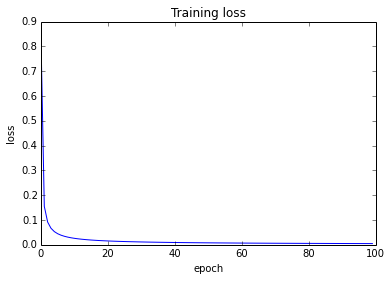

In [9]:
plot(losses)
title('Training loss')
xlabel('epoch')
ylabel('loss')

## 4. Plot the decision boundary

In [10]:
def plot_decision_boundary(X, y, w, b):
    x1 = np.linspace(X[:,0].min(), X[:, 0].max(), 200)
    x2 = np.linspace(X[:,1].min(), X[:, 1].max(), 200)
    X1, X2 = np.meshgrid(x1, x2)
    pts = np.c_[X1.ravel(), X2.ravel()]
    f = predict(pts, w, b).reshape(X1.shape)
    figure(figsize=(7,7))
    scatter(X[:,0], X[:,1], c=y, cmap=cm.Accent, s=30)
    contour(X1, X2, f, 1, levels=[0.5])
    xlabel('$x_1$')
    ylabel('$x_2$')
    title('Decision boundary')
    

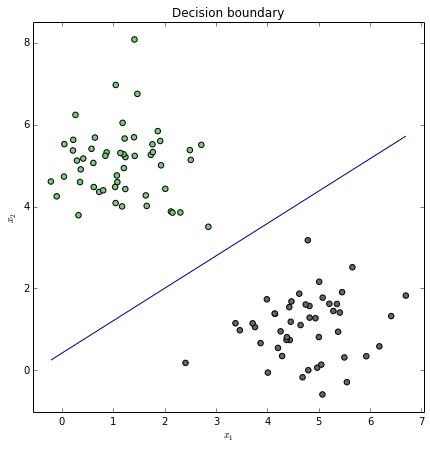

In [11]:
plot_decision_boundary(X, y, w, b)

In [12]:
print w, b

[ 1.75097917 -2.21218184] 0.928197251038
